In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

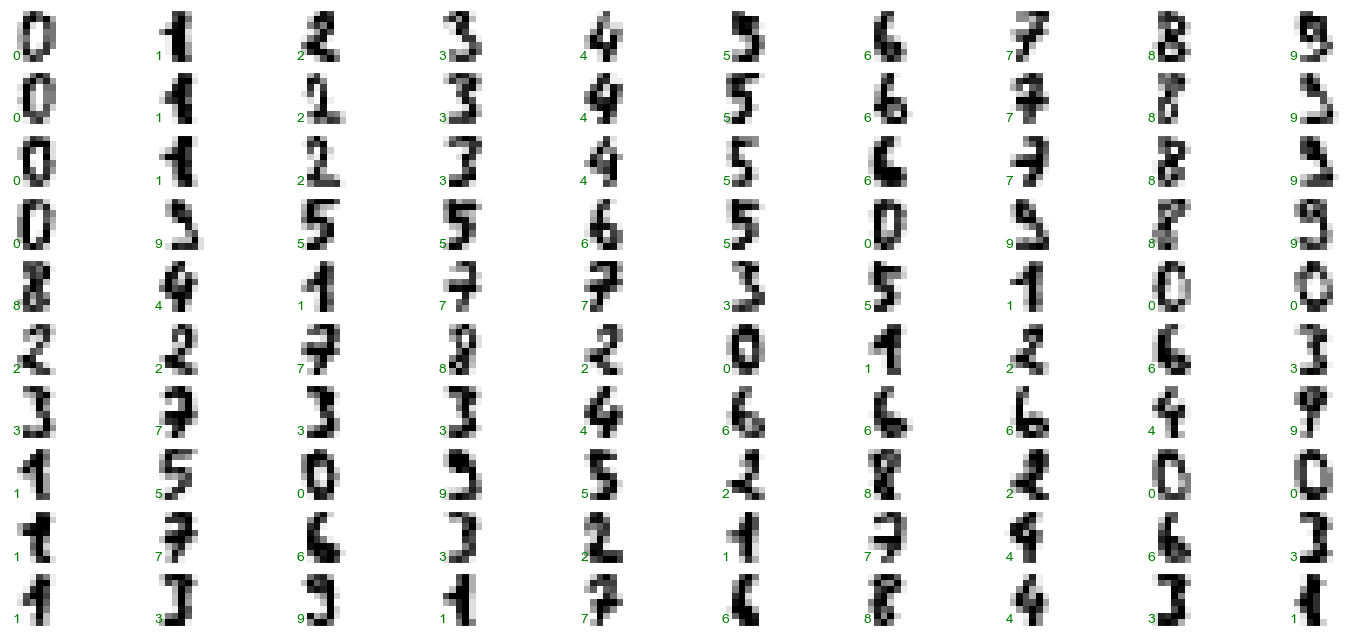

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    10,10, figsize=(18,8), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.2, wspace=0.2)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, 
    color='green')

## plt.subplots 인자들의 역할
- plt.subplots 함수는 여러 개의 서브플롯(그래프)를 생성할 때 사용
    - 10, 10: 서브플롯을 10x10 격자로 생성. 즉, 총 100개의 작은 그래프가 그려짐.
    - figsize=(18,8): 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정
    - subplot_kw={'xticks': [], 'yticks': []}: 각 서브플롯에서 x축과 y축의 눈금을 표시하지 않도록 설정
    - gridspec_kw=dict(hspace=0.1, wspace=0.1): 서브플롯 사이의 수평 간격(hspace)과 수직 간격(wspace)을 각각 0.1로 설정. 이는 각 그래프 사이의 여백을 의미.

## for 반복문의 역할
- for 반복문은 서브플롯에 이미지와 텍스트를 하나씩 할당하는 작업을 수행:
    - enumerate(axes.flat): axes.flat은 생성된 모든 서브플롯을 1차원 배열로 평평하게 펼치고, enumerate는 이 배열을 순회하면서 인덱스(i)와 해당 요소(ax)를 제공
    - ax.imshow(digits.images[i], cmap='binary', interpolation='nearest'): 
        - ax.imshow는 이미지를 서브플롯에 표시하는 함수
        - digits.images[i]는 i번째 숫자 이미지를 의미
        - cmap='binary'는 이미지를 이진 색상으로 표시
        - interpolation='nearest'는 픽셀 사이를 보간하지 않고 그대로 표시
    - ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green'): 
        - ax.text는 텍스트를 서브플롯에 추가하는 함수
        - 0.05, 0.05는 텍스트의 위치를 서브플롯 내에서 상대적인 좌표로 지정
        - str(digits.target[i])는 i번째 이미지의 레이블(숫자)을 문자열로 변환하여 표시
        - transform=ax.transAxes는 지정된 좌표를 축의 상대적인 위치로 해석하도록 함.
        - color='green'은 텍스트의 색상을 녹색으로 설정

In [41]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.8688888888888889


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[43  0  0  0  1  0  0  1  0  0]
 [ 0 41  0  0  0  0  0  1  3  0]
 [ 0  1 48  0  1  0  0  0  4  0]
 [ 0  1  1 36  0  2  0  2  2  0]
 [ 0  0  0  0 46  0  0  4  0  0]
 [ 0  0  0  0  0 36  0  1  1  0]
 [ 0  0  1  0  1  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  6  0  2  0  2  0  4 30  0]
 [ 1  2  0  0  2  0  0  9  3 26]]


Text(115.9222222222222, 0.5, 'True Values')

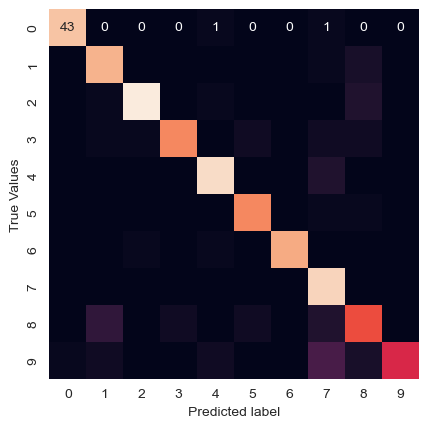

In [45]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred), square=True, annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Values")